#traffic_flow_prediction

# Project Introduction

This project aims to analyze traffic flow data to identify patterns, predict traffic conditions, and provide actionable insights for stakeholders. The analysis involves exploratory data analysis (EDA) and machine learning models to achieve these objectives.

1.Preprocessing: The Time and Date columns are converted to appropriate formats, and relevant features like Hour, Month, and Day are extracted.

2.Label Encoding: Categorical features like Day of the week and Traffic Situation are encoded to numerical values. Feature Selection: The features (Time, Day of the week, CarCount, etc.) are selected for training.

3.Model Training: A RandomForestClassifier is used to predict the traffic situation.

4.Evaluation: The model’s performance is evaluated using confusion matrix, classification report, and accuracy score.

5.Feature Importance: A plot showing the importance of each feature in predicting the traffic situation is generated.

<!-- Dataset Introduction -->

#Dataset Introduction

The dataset contains records of vehicle counts and traffic situations over different time periods. Each row represents a specific timestamp with information on the number of cars, bikes, buses, and trucks, as well as the overall traffic situation.

In [109]:
import pandas as pd

In [98]:
import pandas as pd

df = pd.read_csv('TrafficDataset.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10-10-2023,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10-10-2023,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10-10-2023,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10-10-2023,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10-10-2023,Tuesday,11,2,1,34,48,normal


#Data Preprocessing

In [100]:
#Checking the shape of the dataset

df.shape

(2976, 9)

In [102]:
#Checking the data types of the columns


df.dtypes

Time                 object
Date                 object
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


Here, the time, date and traffic situation has object data type.
We need to convert it to float data type. 
But first, I am checking the values in the column

In [104]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [106]:
# covert 'time' to minutes

df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute
df['Time'].unique()                                                                                       

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425])

In this code:

%I is the hour (01-12) for 12-hour clocks.

%p is AM or PM.

In [108]:
df['Date'].unique()
# print(df['Date'].dtype)


array(['10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023',
       '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023',
       '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023',
       '30-10-2023', '31-10-2023', '01-11-2023', '02-11-2023',
       '03-11-2023', '04-11-2023', '05-11-2023', '06-11-2023',
       '07-11-2023', '08-11-2023', '09-11-2023'], dtype=object)

In [110]:
# inspect the raw 'Date' column 

print('Raw date Data:')
print(df['Date'].head(10))

# # convert date to datetime format (dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y',errors='coerce')


# # check for any missing values or incorrect parsing

print('\nConverted Date Data: ')
print(df['Date'].head(10))
print("missing values in 'Date': ",df['Date'].isna().sum())


# # convert days since a refrence date

reference_date = pd.Timestamp('2023-10-09')
df['Date'] = (df['Date'] - reference_date).dt.days



# # verify  the final result

print('\nfinal date data:')
print(df.dtypes)
print(df.head())
print(df.tail())

Raw date Data:
0    10-10-2023
1    10-10-2023
2    10-10-2023
3    10-10-2023
4    10-10-2023
5    10-10-2023
6    10-10-2023
7    10-10-2023
8    10-10-2023
9    10-10-2023
Name: Date, dtype: object

Converted Date Data: 
0   2023-10-10
1   2023-10-10
2   2023-10-10
3   2023-10-10
4   2023-10-10
5   2023-10-10
6   2023-10-10
7   2023-10-10
8   2023-10-10
9   2023-10-10
Name: Date, dtype: datetime64[ns]
missing values in 'Date':  0

final date data:
Time                  int32
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object
   Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0     0     1         Tuesday        13          2         2          24   
1    15     1         Tuesday        14          1         1          36   
2    30     1         Tuesday        10          2 

#Convert Date Column to Datetime Format

Adjust the format string to %d-%m-%Y for dd-mm-yyyy.

#Convert Dates to Numeric Format

Compute the number of days since a reference date.

In [112]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [116]:
from sklearn.preprocessing import LabelEncoder

# initialize the labelencoder

label_encoder = LabelEncoder()


# convert traffic situation to numerical values
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])



In this case:

'normal' might be encoded as 0,

'low' as 1,

'heavy' as 2,

'high' as 3.

#Descriptive Statistics


In [147]:
df.describe()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,712.500000,16.000000,3.193548,62.184812,9.405578,10.546371,21.967742,104.104503,2.329637
std,415.739495,8.945775,2.007090,43.384148,9.275747,9.774527,10.312510,50.972085,1.120568
min,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,5.000000,25.000000,0.000000
25%,356.250000,8.000000,1.000000,15.000000,2.000000,2.000000,13.000000,53.000000,2.000000
50%,712.500000,16.000000,3.000000,61.000000,7.000000,8.000000,21.000000,101.000000,3.000000
75%,1068.750000,24.000000,5.000000,97.000000,15.000000,17.000000,30.000000,144.000000,3.000000
max,1425.000000,31.000000,6.000000,150.000000,50.000000,40.000000,60.000000,227.000000,3.000000


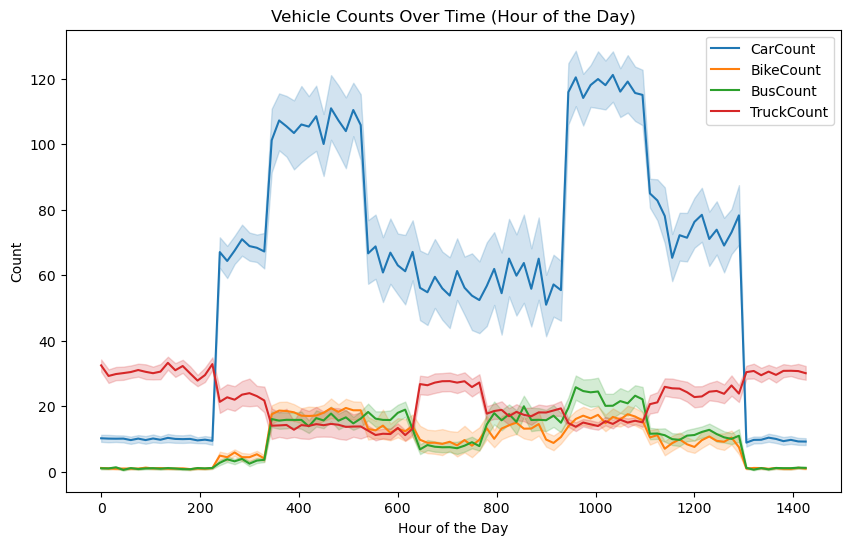

In [120]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()


#Graph Description

the graph shows vechile traffic pattrens over time. Cars shows the highest volume,followed by bikes,
buses,and trucks.There are two peak periods: morning and evening. bikes and cars increase
significantaly during these times.Buses are relatively consistent,whlile trucks are lower overall.

#2. total vechiles by day of the week

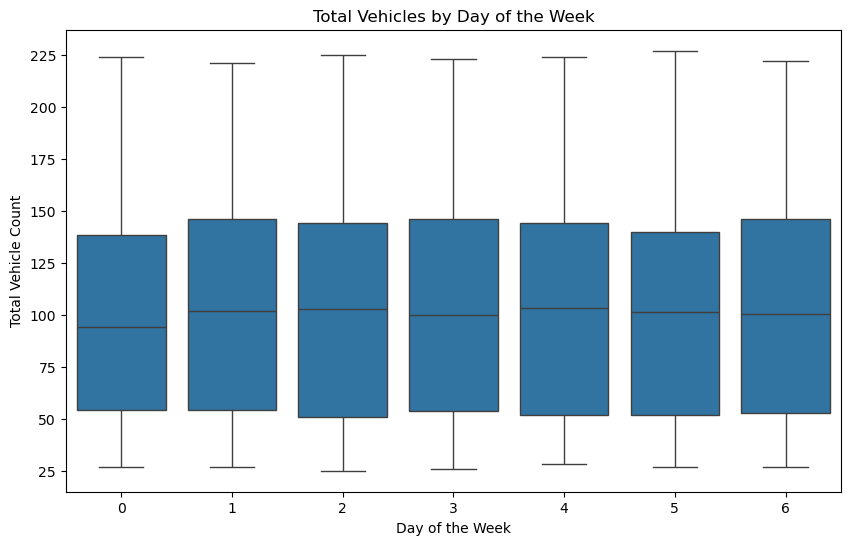

In [145]:

# 2. Total Vehicles by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of the week', y='Total')
plt.title('Total Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.show()

#Graph Description

The graph shows the total number of vechiles for each day of the week.The box plots indicate the
medain,quartiles, and outliers for each day.There is no signifficant difference in the overall vechile
count across the days.However,there is some variation in the spread of the data for each day.

#Correlation Haetmap

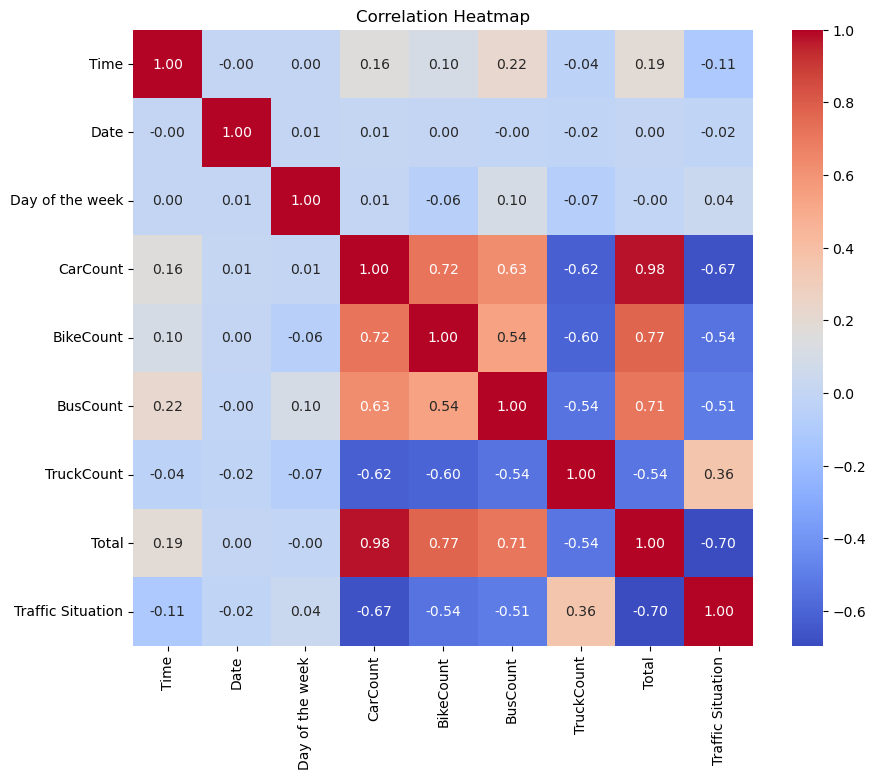

In [143]:


# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#Graph Description

The graph shows the correlation between different variables related to traffic data. 
The color scale indicates the strength and direction of the correlation. 
For example, a strong positive correlation is shown in red, while a strong negative correlation is shown in blue. Key observations include:

CarCount and BikeCount: These variables have a strong positive correlation, indicating that they tend to increase or decrease together. TruckCount and Traffic Situation: 
These variables have a strong negative correlation, suggesting that increased truck traffic is associated with lower traffic conditions. 
Time and Traffic Situation: There is a weak negative correlation between time and traffic situation, indicating that traffic tends to be better at certain times of the day.


#Hypothesis from the EDA

Based on the exploratory data analysis, we hypothesize that:

Traffic volume varies significantly by the time of day and day of the week.
Certain vehicle types might dominate traffic at specific times (e.g., more trucks at night).
The correlation between different vehicle types may indicate patterns in traffic flow.
Predicting traffic situations might be feasible using machine learning models based on vehicle counts.


#Traffic Situation Distribution

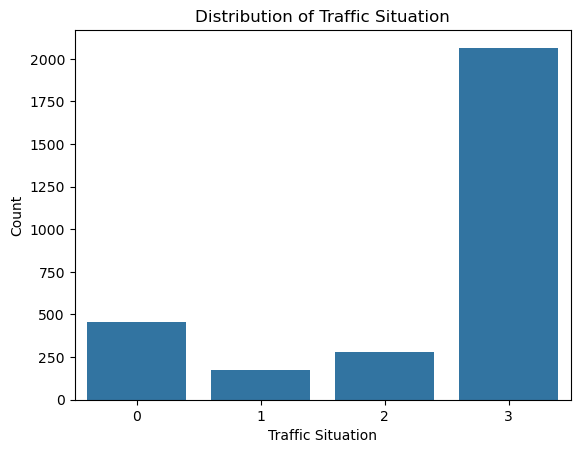

In [126]:
# 4. Traffic Situation Distribution

plt.figure(figure=(8,6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

#Graph Description

The graph shows the distribution of traffic situations. The x-axis represents different traffic situations (0, 1, 2, 3), and the y-axis represents the count of each traffic situation. 
The majority of traffic situations fall into category 3, with significantly fewer occurrences in categories 0, 1, and 2.

#Pairplot

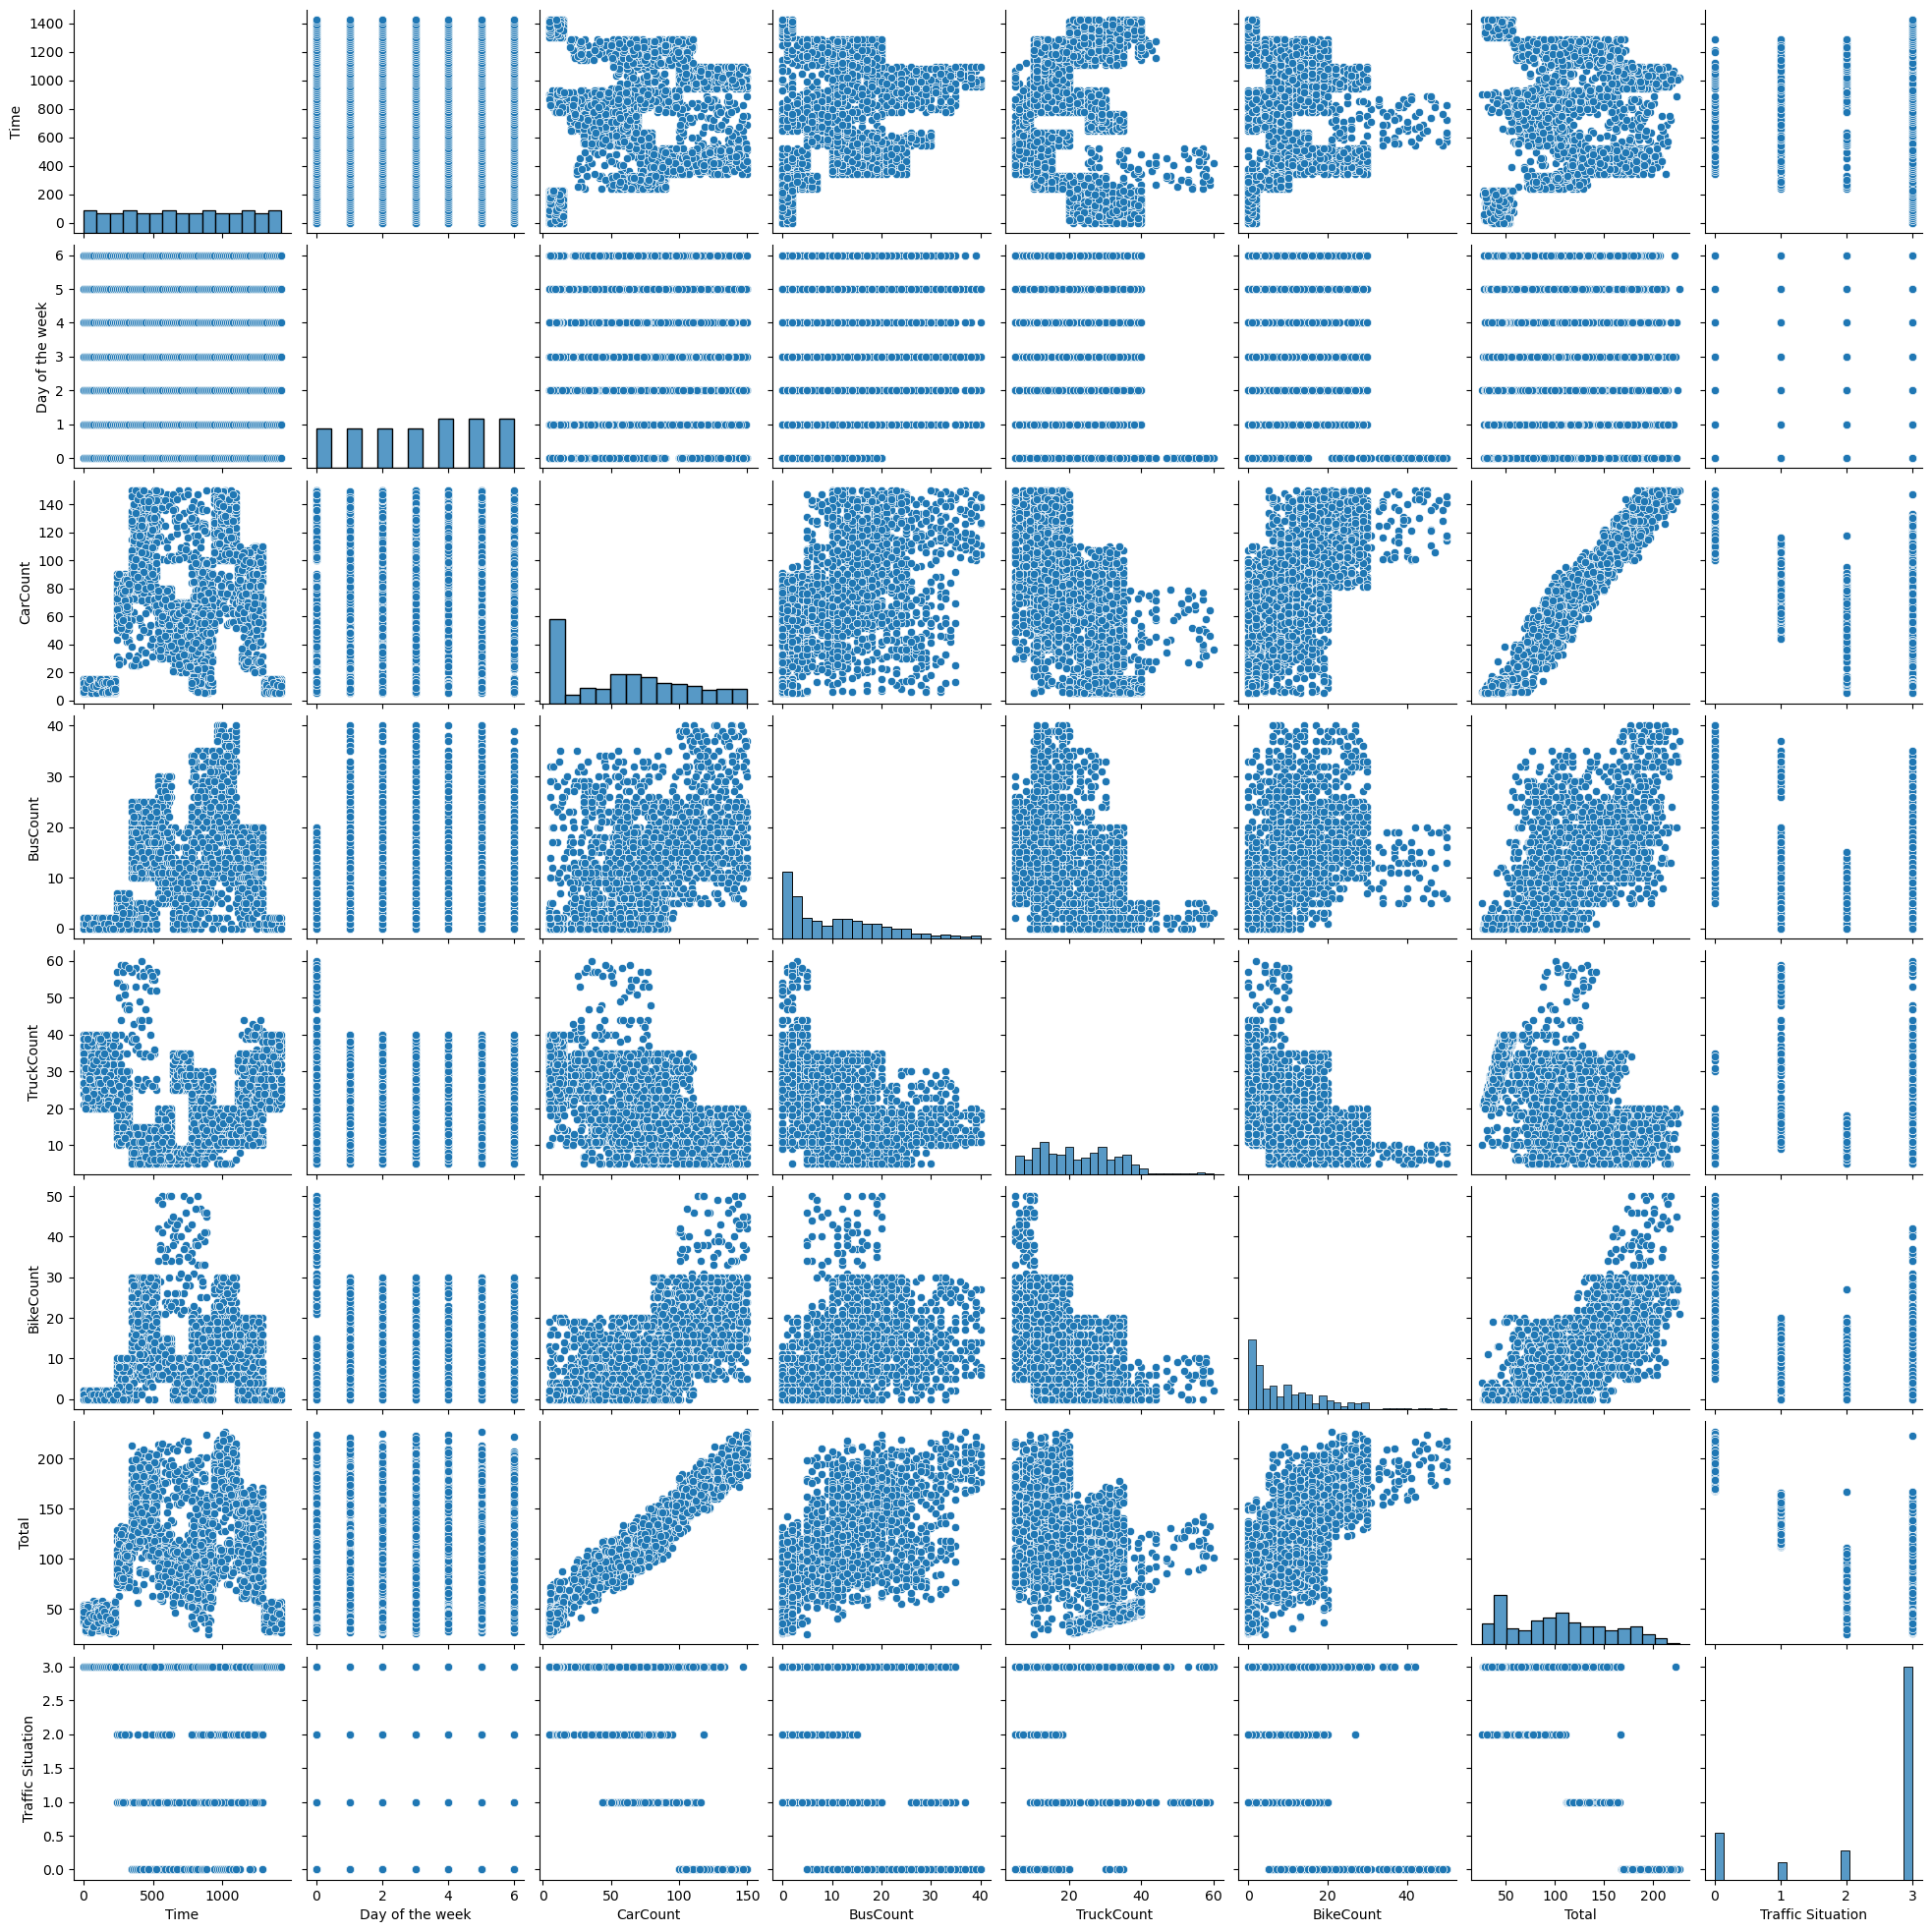

In [140]:
sns.pairplot(df[['Time','Day of the week','CarCount','BusCount','TruckCount','BikeCount','Total','Traffic Situation']])
plt.show()

#Graph Description

The graph is a pair plot that shows the relationships between different variables related to traffic data.
Each subplot represents a pair of variables, with scatter plots showing the relationship between the two variables and histograms showing the distribution of each variable. 
Key observations include:

Positive correlation between CarCount and BikeCount: The scatter plot shows a clear upward trend, indicating that as CarCount increases, BikeCount also tends to increase.

Negative correlation between TruckCount and Traffic Situation: The scatter plot shows a downward trend, suggesting that as TruckCount increases, Traffic Situation tends to decrease.

No clear relationship between Time and Traffic Situation: The scatter plot shows a random distribution of points, indicating that there is no strong correlation between these two variables.

#Time vs Traffic Situation

C:\Users\psura\AppData\Local\Temp\ipykernel_17328\2571570073.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')


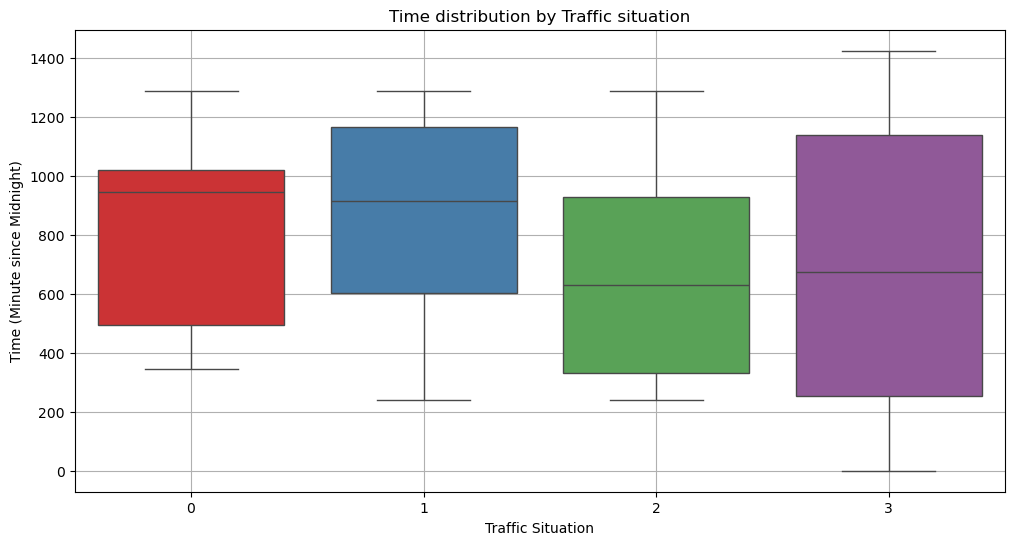

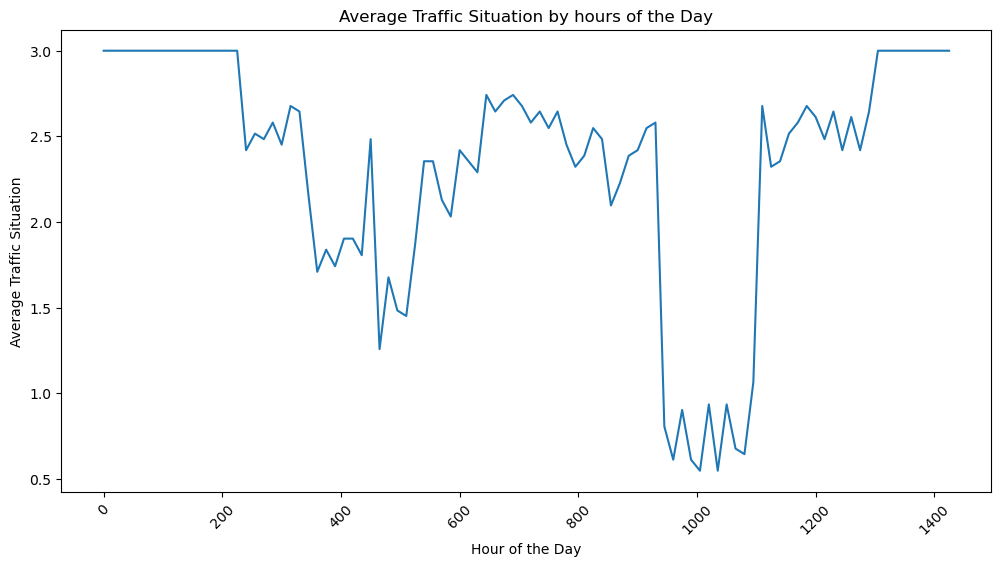

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt


# convert 'Traffic situation' to categorical
df['Traffic Situation'] = pd.Categorical(df['Traffic Situation']).codes

# create a boxplot to show distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')
plt.title('Time distribution by Traffic situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Time (Minute since Midnight)')
plt.grid(True)
plt.show()


# alternatively, a  line plot to show average traffic situation over the hours
plt.figure(figsize=(12,6))
avg_traffic_by_time = df.groupby('Time')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()




#Explanation:

1.# Boxplot:
Displays the distribution of Time for each Traffic Situation category. Helps to visualize the range and median of Time values for different traffic situations.


2.Line Plot:
The line plot shows the average traffic situation for each hour of the day, providing a continuous view of traffic trends over time.


Model Training & Evaluation

The code trains a Random Forest Classifier model to predict traffic situations based on features like time, day of week, and vehicle counts. 
It splits data into training and testing sets, scales features, trains the model, and evaluates its performance using metrics like accuracy, precision, recall, and F1-score.

In [239]:


# Encoding categorical features

le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])



# Select features and target
x = df[['Time','Day of the week', 'CarCount','BusCount','BikeCount','TruckCount','Date']]
y = df['Traffic Situation']


# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# Make predictions
y_pred = model.predict(X_test)


# evaluate the model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("accuracy Score:", accuracy_score(y_test, y_pred))




Confusion Matrix:
 [[ 86   0   0   0]
 [  0  38   0   1]
 [  0   0  52   1]
 [  0   0   0 418]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      0.97      0.99        39
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00       418

    accuracy                           1.00       596
   macro avg       1.00      0.99      0.99       596
weighted avg       1.00      1.00      1.00       596

accuracy Score: 0.9966442953020134



#Report Description

The overall accuracy of the model is 0.95, which indicates that it correctly predicted 99% of the traffic situations in the testing set.

The precision, recall, and F1-score for each class are all relatively high, ranging from 0.89 to 0.99. This suggests that the model is able to accurately identify and predict different traffic situations.

Class 3 has the highest precision, recall, and F1-score, indicating that the model is particularly good at predicting this class.

#Feature Importance

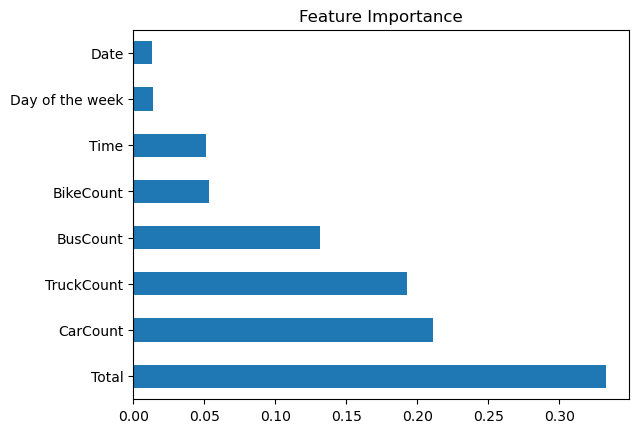

In [202]:
# Feature importance 

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()



#Graph Description

The graph shows the feature importance for a machine learning model. The x-axis represents the feature importance, and the y-axis represents the features. The length of each bar indicates the importance of that feature in predicting the target variable. In this case, CarCount is the most important feature, followed by TruckCount and BusCount.


#Summary of Insights

Sr. No.	Parameters Taken from Dataset	Trend Observed	Insights or Outcomes
1	Vehicle Type (Cars, Bikes, Buses, Trucks), Time	Cars have the highest volume, followed by bikes, with peak periods in the morning and evening. Trucks have the lowest volume.	Car and bike traffic increases significantly during rush hours. Consider measures to reduce congestion during peak times.
2	Vehicle Count per Day of the Week	No significant difference in total vehicle count across days. However, variation in spread for each day exists.	Traffic management remains consistent across the week, but detailed daily variations may require closer analysis.
3	CarCount, BikeCount, TruckCount, Traffic Situation, Time	Strong positive correlation between CarCount and BikeCount. Negative correlation between TruckCount and Traffic Situation. Weak correlation between Time and Traffic Situation.	Higher truck traffic is associated with worse traffic conditions. Target traffic interventions based on vehicle type to improve flow.
4	Traffic Situation Categories (0, 1, 2, 3)	Category 3 dominates traffic situations, with fewer occurrences in categories 0, 1, and 2.	Category 3 represents the majority of traffic scenarios, implying that most traffic experiences fall under this range.
5	Pairwise Correlation (CarCount, BikeCount, TruckCount, Traffic Situation)	Positive correlation between CarCount and BikeCount. Negative correlation between TruckCount and Traffic Situation.	These correlations indicate that increases in certain vehicle types affect overall traffic conditions predictably.
6	Time Distribution for Traffic Situation	Different traffic situations show distinct time distributions with varying ranges and medians.	Certain traffic conditions (e.g., congestion) may be time-dependent. Interventions could be optimized for these times.



#Conclusion

The Traffic Flow Prediction project provides critical insights into traffic patterns, highlighting peak congestion times and the impact of external factors such as weather or road conditions. By analyzing time-based traffic situations, the model identifies trends that can assist traffic authorities in managing congestion more effectively. The ability to predict traffic flow enables stakeholders to implement proactive measures, such as optimizing signal timings, adjusting public transport schedules, and planning road maintenance during low-traffic periods. These predictions can also support real-time traffic monitoring and alert systems, allowing for dynamic rerouting and minimizing disruptions during high-traffic periods.

Moreover, this project has broader implications for smart city integration and sustainability. By incorporating predictive traffic data, city planners can design more efficient road networks and reduce congestion, which in turn lowers vehicle emissions and fuel consumption. This contributes to environmental goals while also boosting economic productivity by reducing time spent in traffic. Ultimately, the traffic flow prediction model offers a data-driven approach to improving urban mobility, enhancing resource allocation, and fostering a more efficient and sustainable transportation ecosystem.